# Best Neighborhood for a dog in pittsburgh (Bens part)
## By Park Area:

# DOGS LIKE PARKS!!!!
### What neighborhood has the access to the most park area!!!


![dog](https://media.giphy.com/media/ZNegC7wFpuQT7nurZ0/giphy.gif)

In [1]:
# import step
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import random

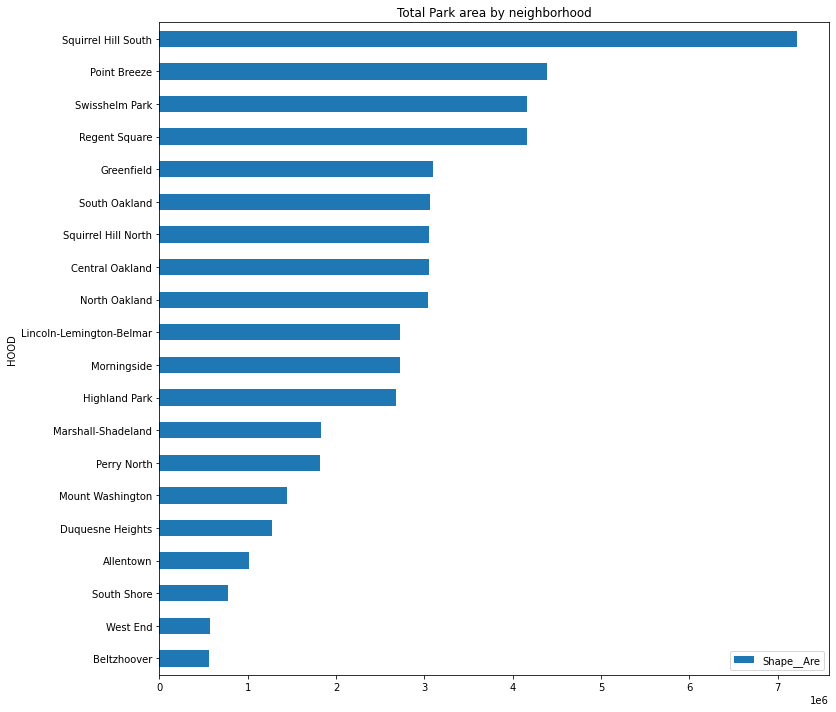

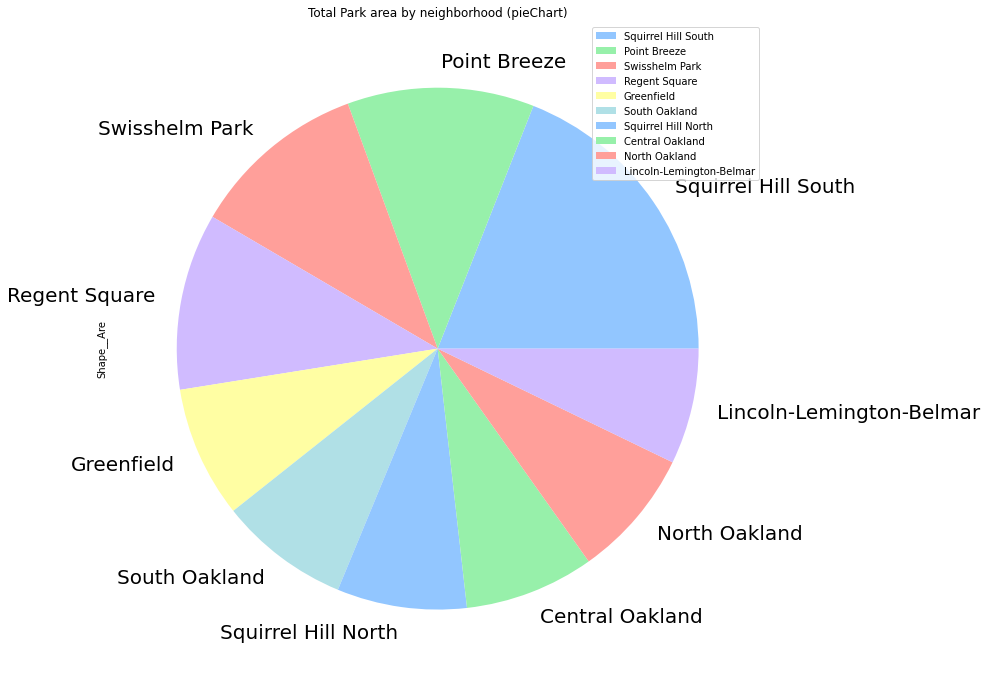

In [2]:
#reading in my dataframe to make this dataset I used arcgis
#to split the neighborood csv by the park csv based on whether there was overlap
data = pd.read_csv("realData.csv")

#taking in the real data then cutting down the data set into important values
#then sorting them based on the park area 
data1 = data[['HOOD','Shape_Area', 'updatepknm','Shape__Are']]
shapeData = data1.sort_values(by='Shape_Area',ascending=False)
df = shapeData[['Shape__Are', 'HOOD', 'Shape_Area','updatepknm']]


#this is the part where everything is added together if it has the same hood name
aggregation_functions = {'Shape__Are': 'sum', 'Shape_Area': 'sum','HOOD': 'first','updatepknm': 'sum'}

df_new = df.groupby(df['HOOD']).aggregate(aggregation_functions)
df_new = df_new.sort_values(by='Shape__Are',ascending=False)
df_new = df_new[['HOOD', 'updatepknm','Shape__Are']]


#this is the graphing part
df_new[0:20].plot(kind='barh',rot = 0, figsize=(12,12), title="Total Park area by neighborhood").invert_yaxis()
plt.style.use('seaborn-pastel')
df_new[0:10].plot.pie(y='Shape__Are', figsize=(12,12), fontsize=20, title="Total Park area by neighborhood (pieChart)")


plt.show()

### Above is a bar graph and a pie chart representing the area of parks by neighborhood, squirrel hill south is shown to have 

### This is a list of the neighborhood

In [3]:
df_new = df_new[['updatepknm','Shape__Are']]
df_new.head(30)

,updatepknm,Shape__Are
HOOD,,
Squirrel Hill South,Frick ParkSchenley ParkDavis ParkFour Mile Run...,7.220538e+06
Point Breeze,Frick ParkMellon ParkMellon Park IslandSterret...,4.393606e+06
Swisshelm Park,Frick ParkSwisshelm ParkWindermere Circle 1 & ...,4.166232e+06
Regent Square,Frick ParkRegent Square War Memorial,4.157575e+06
Greenfield,Magee ParkSchenley ParkFour Mile Run ParkSalin...,3.094934e+06
South Oakland,Schenley ParkFrazier ParkLawn and Ophelia Park...,3.066373e+06
Squirrel Hill North,Schenley ParkWightman Park,3.051154e+06
Central Oakland,Schenley ParkZulema ParkOakland SquareBoundary...,3.048607e+06
North Oakland,Schenley ParkHarris Triangle,3.037520e+06


### this is a test to confirm that the addition of each neighborhood works
This adds the data in a different way, as you can see it matches the data above. meaning that the addition method I did probably worked as intended

In [4]:
data = pd.read_csv("realData.csv")

data1 = data[['HOOD','Shape_Area', 'updatepknm','Shape__Are']]
data1 = data1.sort_values(by='HOOD')
shapeData = data1.sort_values(by='Shape_Area',ascending=False)

sqs = shapeData[shapeData.HOOD == "Squirrel Hill South"]
sqs = sqs[["Shape__Are"]]
sqSum = sqs.sum()
print(sqSum, "sq of total park in squirrel hill south")

#npNumbers = data[data.Park_Name == "North Park"]

Shape__Are    7.220538e+06
dtype: float64 sq of total park in squirrel hill south


# The Data from above shows that the top Three neighborhoods with the most parks are: 
## #1)Squirrel hill south
### #2)Point Breeze
#### #3)Swisshelmpark

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

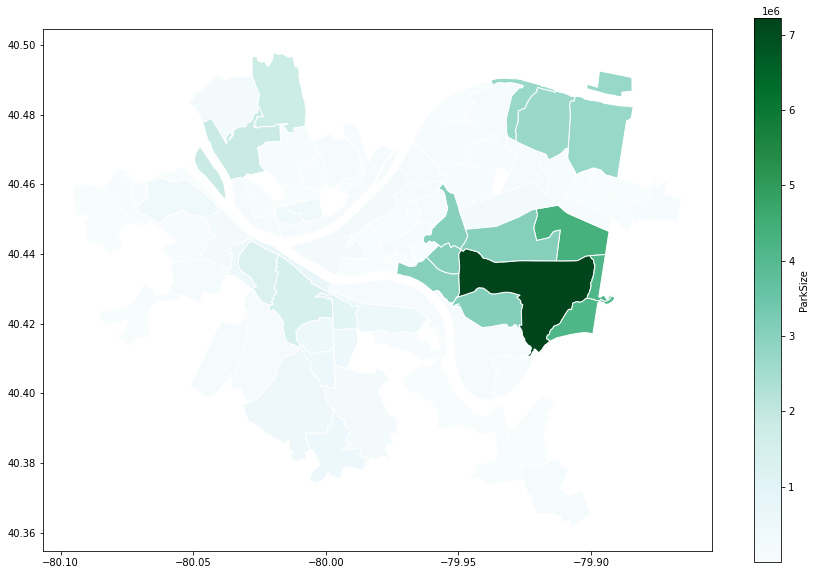

In [6]:
df_map = neighborhoods.merge(df_new, how='left', left_on='hood', right_on='HOOD')
df_map.head()
df_map.plot(column='Shape__Are_y',# set the data to be used for coloring
               cmap='BuGn',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "ParkSize"}, # label the legend
               figsize=(15, 10),         # set the size # set disctricts with no data to gray
               )